In [7]:
%load_ext autoreload
import trafpy
import trafpy.generator as tpg
import os
import json

# load demand data
# DATA_NAME = 'ndf50_mldat6e8_university'
DATA_NAME = 'university_chancap500_numchans1_mldat2e6_bidirectional'
path_to_benchmark_data = os.path.dirname(trafpy.__file__)+'/../data/benchmark_data/{}_benchmark_data.json'.format(DATA_NAME)
benchmark_data = json.loads(tpg.load_data_from_json(path_to_benchmark_data))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Time to load data from /home/zciccwf/phd_project/projects/trafpy/trafpy/../data/benchmark_data/university_chancap500_numchans1_mldat2e6_bidirectional_benchmark_data.json: 3.042567014694214 s


In [8]:
%autoreload

# organise into list of demand_data dicts
benchmarks = list(benchmark_data.keys())
demand_data_list = []
loads = []
for benchmark in benchmarks:
    for load in benchmark_data[benchmark]:
        for repeat in benchmark_data[benchmark][load]:
            demand_data = benchmark_data[benchmark][load][repeat]
            demand_data_list.append(demand_data)
            loads.append(load)
num_sets_of_demand_data = len(demand_data_list)
print('Number of sets of demand data: {}'.format(num_sets_of_demand_data))

Number of sets of demand data: 10


/home/zciccwf/phd_project/projects/trafpy/trafpy/generator/src/dists/plot_dists.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.matshow(node_dist, cmap='YlOrBr')
/home/zciccwf/phd_project/projects/trafpy/trafpy/generator/src/dists/plot_dists.py:131: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(15*fig_scale,5*fig_scale))
/home/zciccwf/phd_project/projects/trafpy/trafpy/generator/src/dists/plot_dists.py:131: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interfac

+----+--------+---------+-------+-------------+-------------+-------------+----------+------------+-------------+
|    | Name   |   Flows |   1st |        Last |    Duration |        Info |     Load |   Smallest |     Largest |
|----+--------+---------+-------+-------------+-------------+-------------+----------+------------+-------------|
|  0 | demand |   48000 |     0 | 2.76742e+06 | 2.76742e+06 | 8.27885e+08 |  598.307 |          1 | 3.01406e+06 |
|  1 | demand |   96000 |     0 | 2.65618e+06 | 2.65618e+06 | 1.42981e+09 | 1076.6   |          1 | 2.05473e+06 |
|  2 | demand |   96000 |     0 | 2.4776e+06  | 2.4776e+06  | 1.98409e+09 | 1601.63  |          1 | 4.41804e+06 |
|  3 | demand |  192000 |     0 | 2.66845e+06 | 2.66845e+06 | 2.831e+09   | 2121.83  |          1 | 1.77341e+06 |
|  4 | demand |  192000 |     0 | 2.32641e+06 | 2.32641e+06 | 3.16073e+09 | 2717.26  |          1 | 1.7945e+06  |
|  5 | demand |  192000 |     0 | 2.33243e+06 | 2.33243e+06 | 4.17956e+09 | 3583.87  |  

/home/zciccwf/phd_project/projects/trafpy/trafpy/generator/src/dists/plot_dists.py:335: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
/home/zciccwf/phd_project/projects/trafpy/trafpy/generator/src/dists/plot_dists.py:335: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


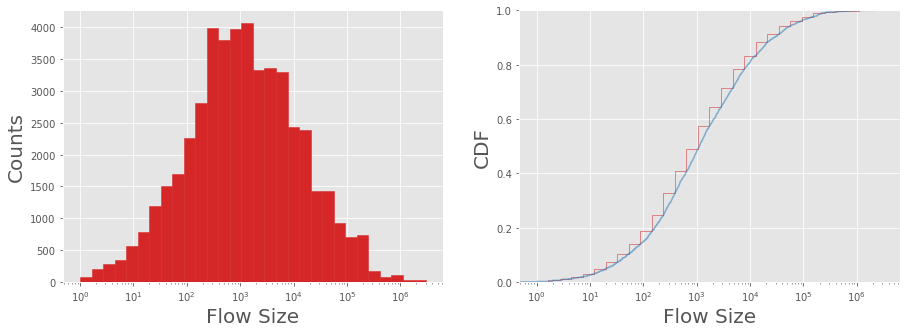

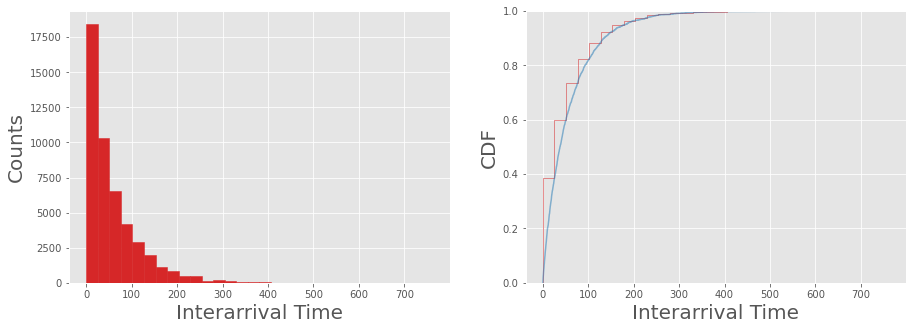

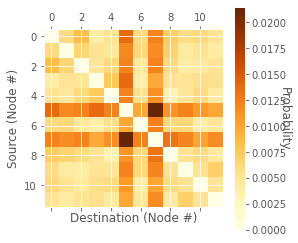

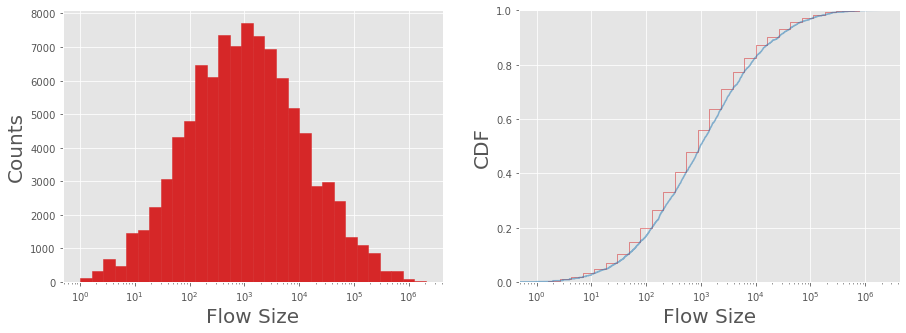

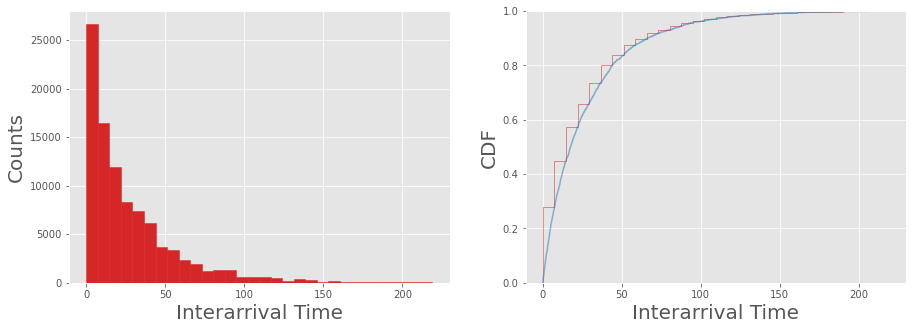

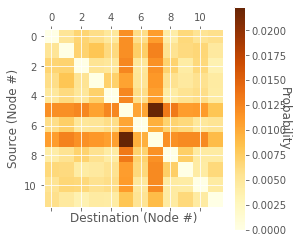

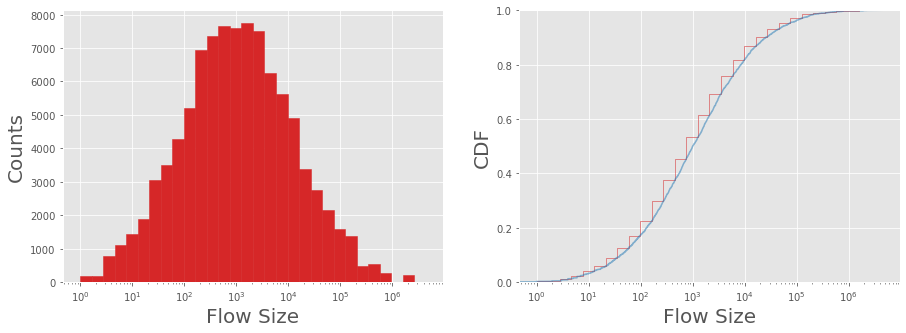

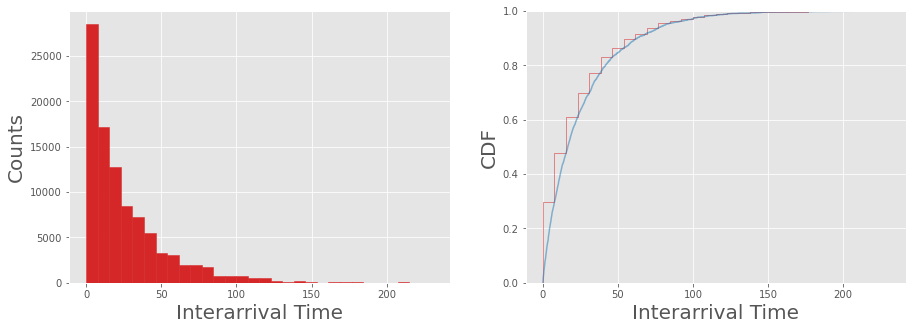

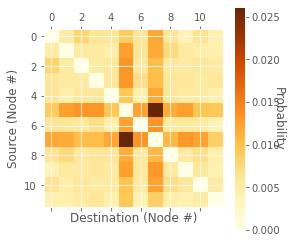

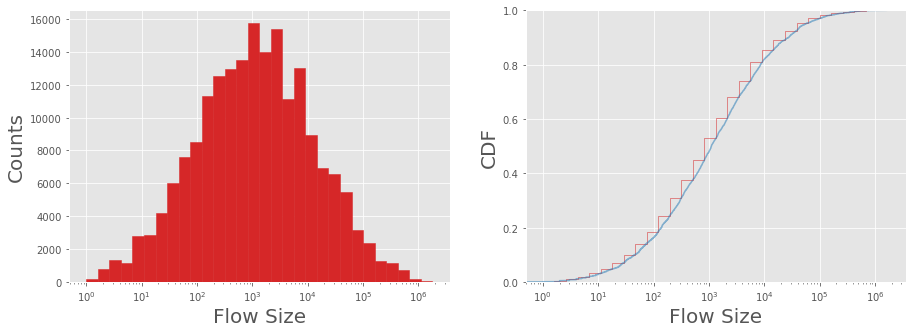

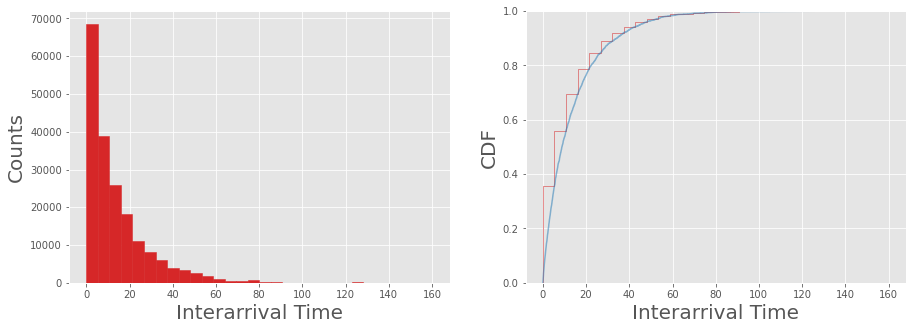

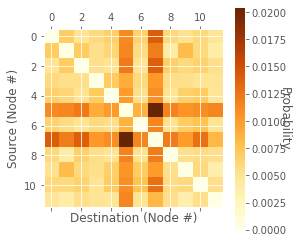

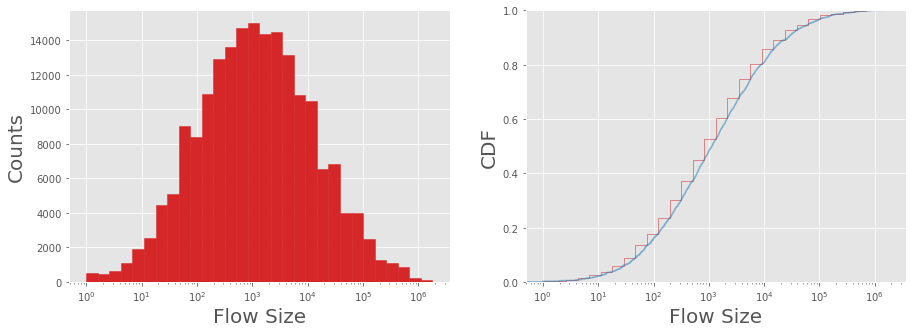

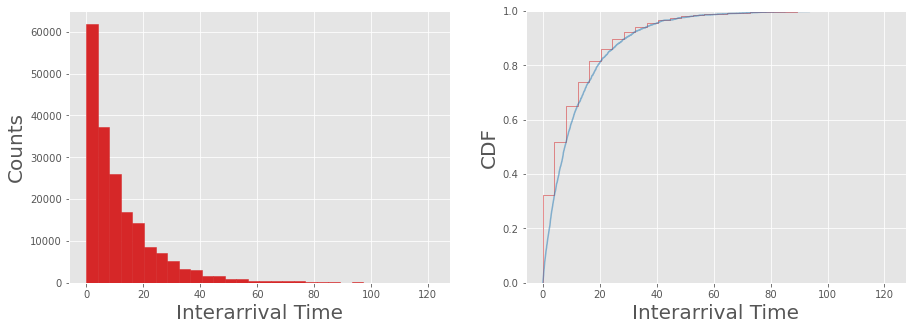

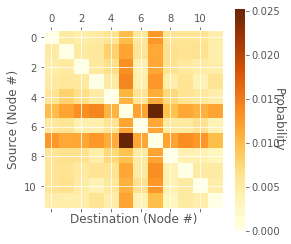

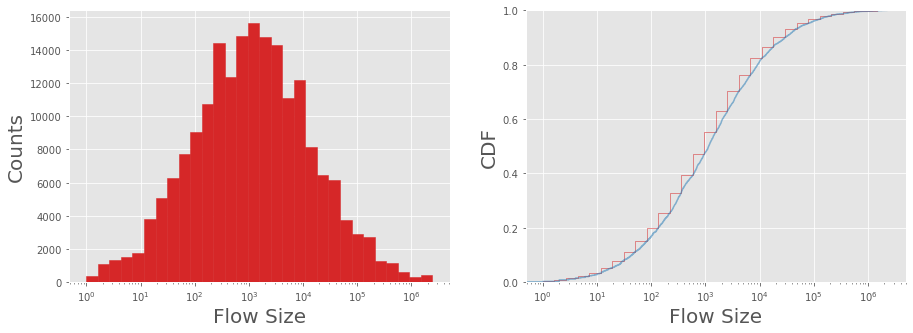

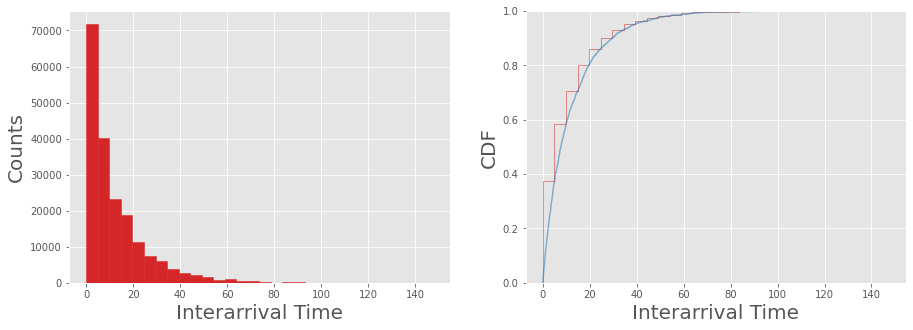

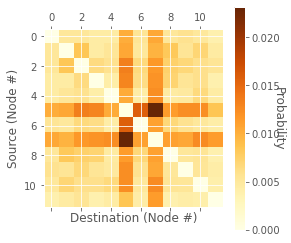

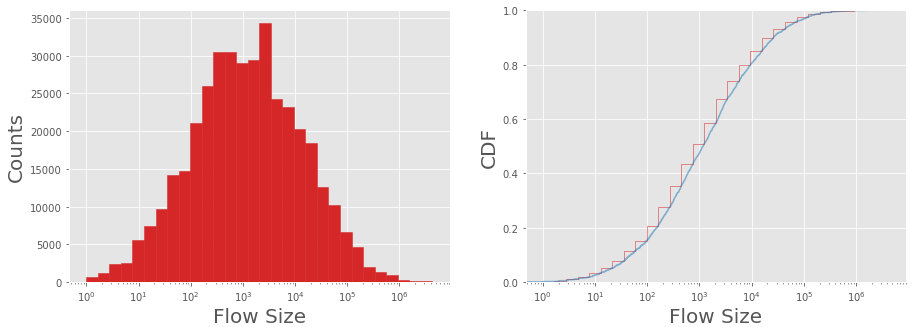

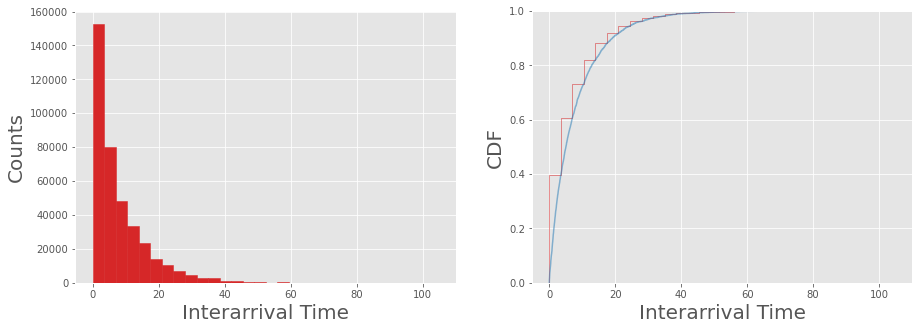

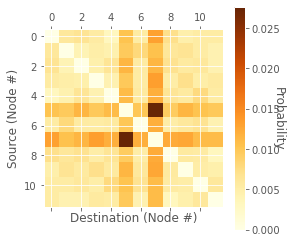

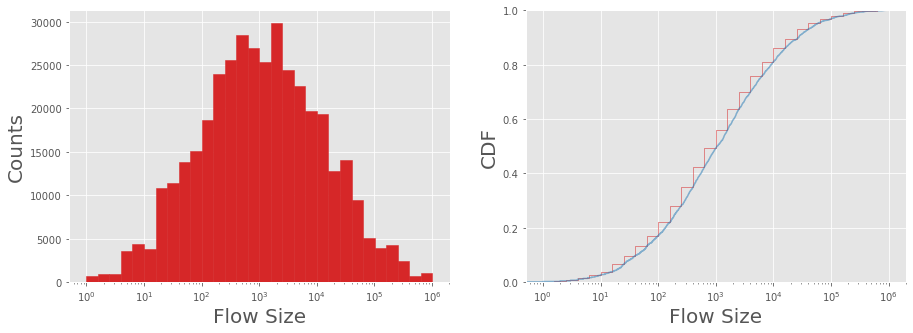

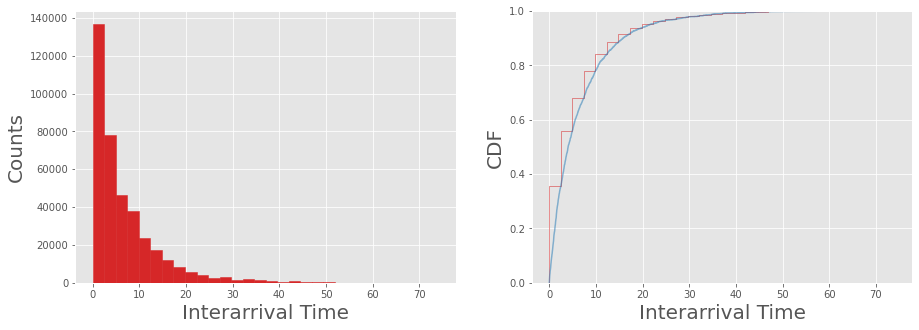

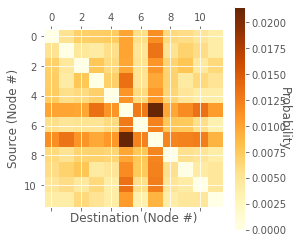

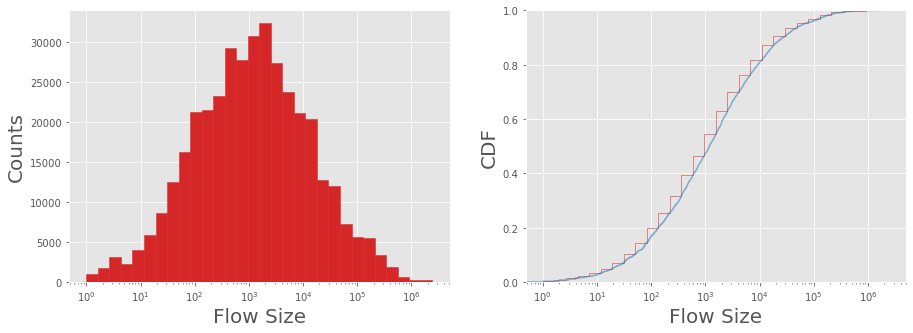

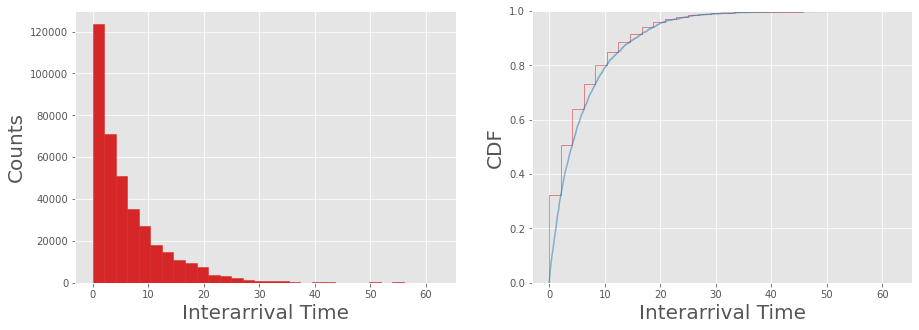

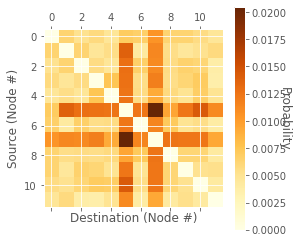

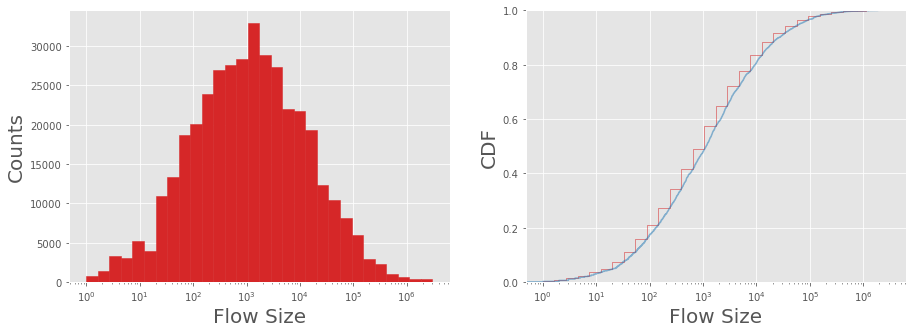

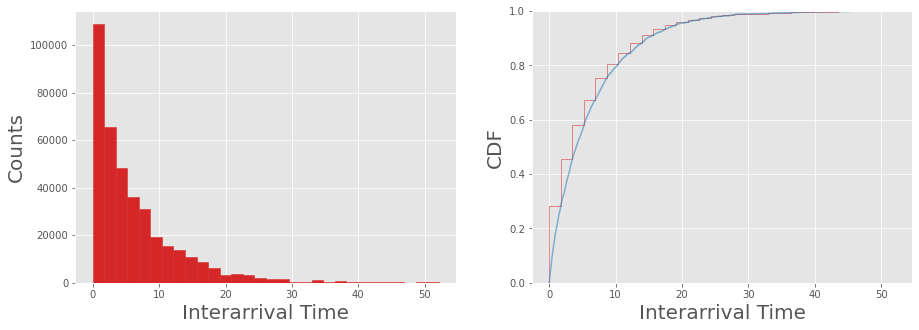

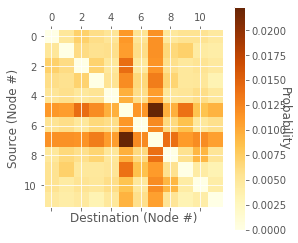

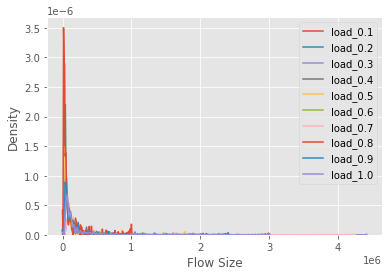

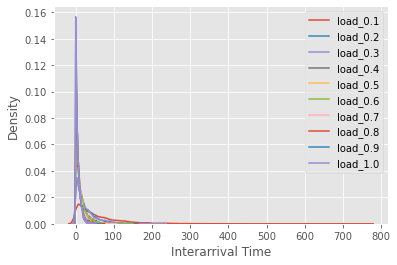

In [9]:
%autoreload
import matplotlib.pyplot as plt
from trafpy.generator import Demand, DemandsAnalyser, DemandPlotter, DemandsPlotter

# create demand objects and print analysis summary
demands = []
for demand_data, load in zip(demand_data_list, loads):
    demand = Demand(demand_data)
    demand.name = 'load_{}'.format(load) # name for multi-plot legend(s)
    demands.append(demand)
    plotter = DemandPlotter(demand)
    plotter.plot_flow_size_dist(logscale=True, num_bins=30)
    plotter.plot_interarrival_time_dist(logscale=False, num_bins=30)
    plotter.plot_node_dist(eps=['server_{}'.format(i) for i in range(12)])
#     plotter.plot_node_dist(eps=['{}'.format(i) for i in range(64)])
analyser = DemandsAnalyser(*demands)
analyser.compute_metrics(print_summary=True)

plotters = DemandsPlotter(*demands)
_ = plotters.plot_flow_size_dists(logscale=False)
_ = plotters.plot_interarrival_time_dists(logscale=False)

In [ ]:
%autoreload
print('Keys of first demand data set:\n{}'.format(demand_data_list[0].keys()))
# print('\nStructure of first demand data set:\n{}'.format(demand_data_list[0]))

In [ ]:
%autoreload
for benchmark in benchmarks:
    print(benchmark_data[benchmark].keys())
    for load in list(benchmark_data[benchmark].keys()):
        for repeat in benchmark_data[benchmark][load]:
            print('benchmark: {} | load: {} | repeat: {}'.format(benchmark,load,repeat))

In [ ]:
%autoreload
from trafpy.generator import Demand
import sys
import json

demand = Demand(demand_data_list[-1])
for SLOT_SIZE in [1e4]:
    slots_dict = demand.get_slots_dict(SLOT_SIZE, print_info=True)